In [ ]:
#Mounting at drive for accessing dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Unzipping dataset

#Importing required module which is ZipFile
from zipfile import ZipFile

#Specifying the zip file name to unzip
file_name = "/content/gdrive/MyDrive/Project AI 31 Dec 23.59/1. Classification/Dataset.zip"

#Opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipfile:
    #Extracting all the files
    print('Extracting all the files now...')
    zipfile.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
#Importing all the necessary libraries for modeling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
#Using ImageDataGenerator, creating train and validation generators. We have 2 generator because we need to divide the data
#into 2 different parts for making evaluation process easy, too.
train_img_gen = ImageDataGenerator(rescale = 1./255., 
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 90, 
                                   validation_split = 0.2)

validation_img_gen = ImageDataGenerator(rescale = 1./255., 
                                        validation_split = 0.2)

In [ ]:
#Here, ew give data path and other usefull parameters to our generators using flow_from_directory function, because
#our data are stored in folders
train_flow = train_img_gen.flow_from_directory(directory = "/content/Dataset/Nouveau dossier", 
                               target_size = (227, 227), 
                               color_mode = "rgb",
                               class_mode = "categorical",
                               batch_size = 32, 
                               seed = 2,
                               subset  = "training")

validation_flow = validation_img_gen.flow_from_directory(directory = "/content/Dataset/Nouveau dossier", 
                               target_size = (227, 227), 
                               color_mode = "rgb",
                               class_mode = "categorical",
                               batch_size = 32, 
                               seed = 2, 
                               subset  = "validation")

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
#After data preparation stage is complete, we go for modeling.
#For modeling, we use Transfer Learning using the architecture of MobileNet Neural Network which is built-in model from keras.applications 
#with the weights of imagenet.

model_Mobile = MobileNet(weights = "imagenet", 
                 include_top = False,
                 input_shape = (227, 227, 3))

x = model_Mobile.output
x = Flatten()(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.3)(x)
x = Dense(32, activation = "relu")(x)
x = Dropout(0.2)(x)
out_layer = Dense(6, activation = "softmax")(x)
my_model = Model(inputs = model_Mobile.input, 
                 outputs = out_layer)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
#Here is the summary of our model
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 114, 114, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 114, 114, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 114, 114, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 114, 114, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 114, 114, 32)     128       
 ation)                                                      

In [ ]:
#After, creating our architecture, we need to compile our model with the parameters optimize which is Adam with proper
#learning rate. Then, we set loss and metrics for the model
my_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", 
                 metrics = ["accuracy"])

In [ ]:
#Here, we have 2 callbacks. ModelCheckpoint saves the model during training based on the lowest val_loss value
my_check = ModelCheckpoint('BestModel.h5',
                           monitor = "val_loss",
                           mode = 'min',
                           save_best_only = True,
                           verbose = 1)
#EarlyStopping monitors val_loss in order to decide whether to continue training or not based on overfitting. If at some 
#point the val_loss starts to increase and does not decrease from the current lowest val_loss for the 5 times in a row (patience), 
#our early stopper will stop the training because it decides that the model overfits the training data and does not seem 
#to generalize well
early_stopper = EarlyStopping(monitor = 'val_loss', 
                              patience = 5, 
                              verbose = 1, 
                              mode = "min")

In [ ]:
#At the end, we start model fitting which can also be considered as training process. We set the fitting to variable called 
#history to use in plotting later
history = my_model.fit(train_flow, 
                     epochs = 20, 
                     verbose = 1, 
                     callbacks = [my_check, early_stopper], 
                     validation_data = validation_flow)

Epoch 1/20
75/75 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.3537
Epoch 00001: val_loss improved from inf to 1.17378, saving model to BestModel.h5
75/75 [==============================] - 484s 6s/step - loss: 1.5835 - accuracy: 0.3537 - val_loss: 1.1738 - val_accuracy: 0.5767
Epoch 2/20
75/75 [==============================] - ETA: 0s - loss: 1.1433 - accuracy: 0.5346
Epoch 00002: val_loss improved from 1.17378 to 0.85438, saving model to BestModel.h5
75/75 [==============================] - 476s 6s/step - loss: 1.1433 - accuracy: 0.5346 - val_loss: 0.8544 - val_accuracy: 0.7550
Epoch 3/20
75/75 [==============================] - ETA: 0s - loss: 0.9623 - accuracy: 0.6200
Epoch 00003: val_loss improved from 0.85438 to 0.64064, saving model to BestModel.h5
75/75 [==============================] - 482s 6s/step - loss: 0.9623 - accuracy: 0.6200 - val_loss: 0.6406 - val_accuracy: 0.8433
Epoch 4/20
75/75 [==============================] - ETA: 0s - loss: 0.8548 - 

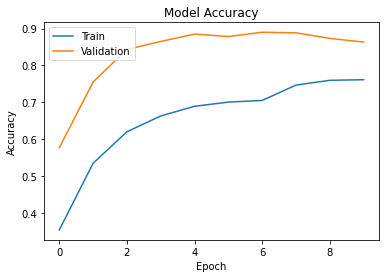

In [ ]:
#Plotting Training and Validation Accuracies per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

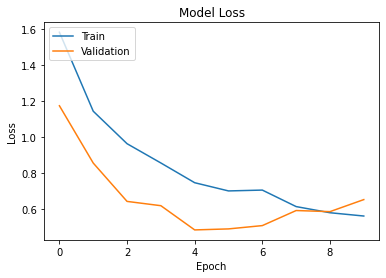

In [ ]:
#Plotting Training and Validation Losses per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
#For making sure that the saved best model can be loaded and used, I load it to use in generation of confusion matrix
loaded_model = load_model('BestModel.h5')

In [ ]:
#Generating steps for each epoch
StepsPerEpoch = np.math.ceil(validation_flow.samples/validation_flow.batch_size)
#Making Predictions
predictions = loaded_model.predict_generator(validation_flow, steps = StepsPerEpoch)
#Making predictions integer number by taking index of maximum value in predictions
predicted_classes = np.argmax(predictions, axis = 1)
#Getting True Values
TrueValues = validation_flow.classes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if sys.path[0] == '':


In [ ]:
#Printing the confusion matrix using the function of scikit.learn
confusion_matrix(TrueValues, predicted_classes)

array([[15, 21, 14, 13, 13, 24],
       [13, 13, 14, 21, 22, 17],
       [16, 19, 14, 16, 14, 21],
       [17, 17, 17, 19, 13, 17],
       [16, 21, 13, 18, 13, 19],
       [13, 19, 25, 16,  9, 18]])

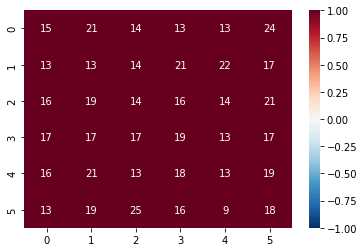

In [ ]:
#Plotting the confusion matrix using the plot of Seaborn plotting library
sns.heatmap(confusion_matrix(TrueValues, predicted_classes), annot = True,  vmin = -1, vmax = 1, center = 0, cmap = "RdBu_r")
plt.show()